In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
student = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/%20Student%20Grade%20Prediction/student-mat.csv")
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
student["G1"].describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

<AxesSubplot:>

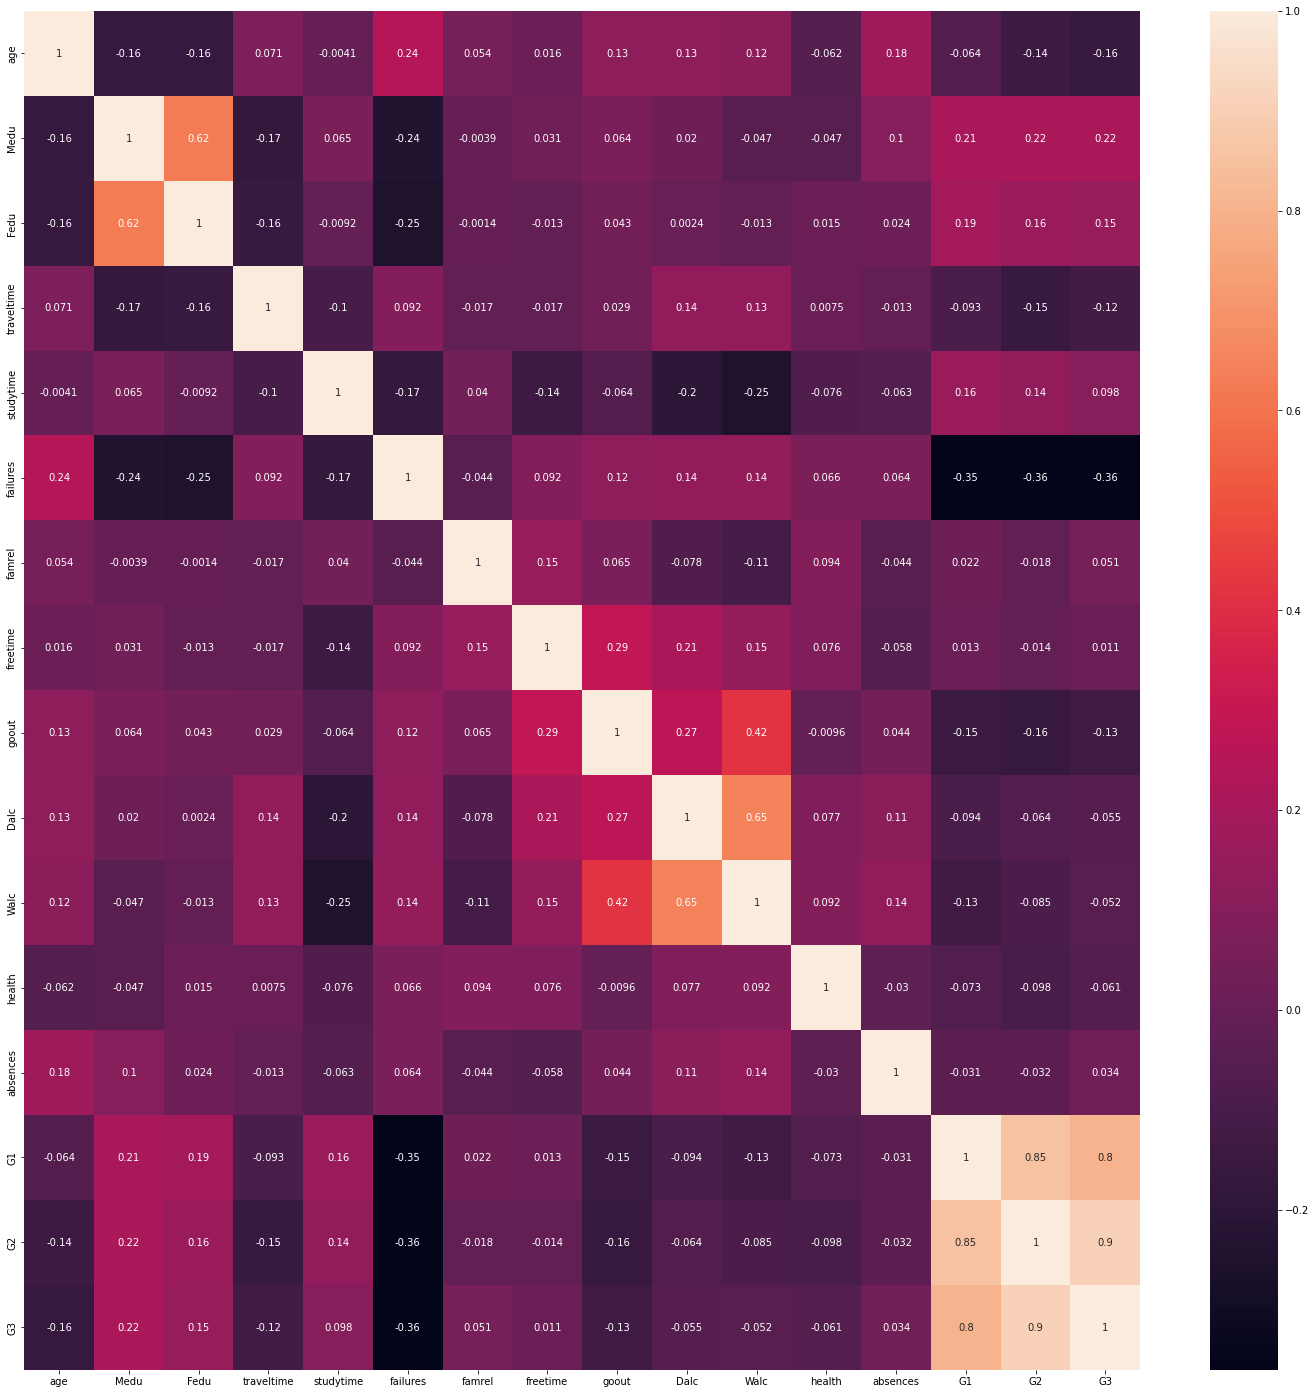

In [10]:
corr = student.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [11]:
matrix_corr = student.corr()
matrix_corr.G3.sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

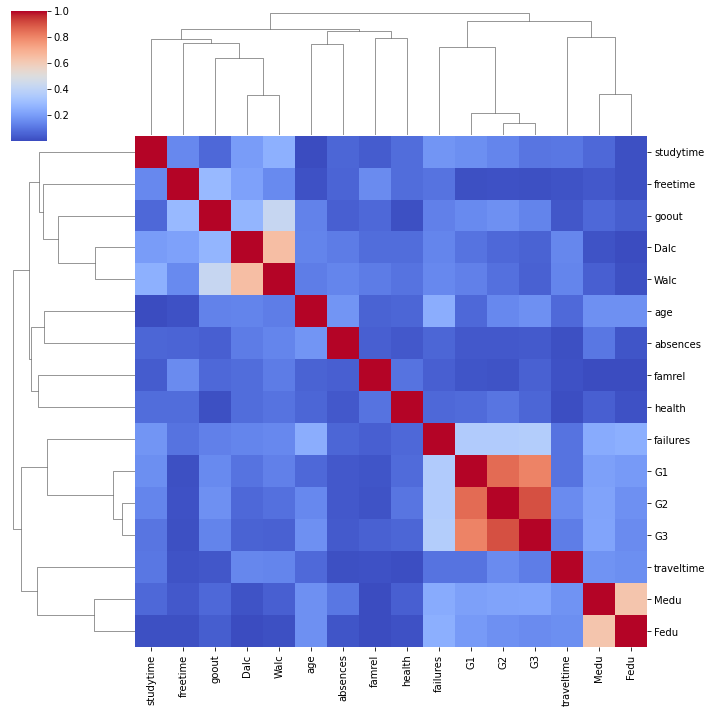

In [12]:
sns.clustermap(abs(corr), cmap="coolwarm")

In [13]:
num_features = [name for name in student.columns if student[name].dtype in ['int64', 'float64']]
cat_features = [name for name in student.columns if student[name].dtype == 'object']
cat_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [14]:
for x in cat_features:
  print(x," = ",student[x].unique())

school  =  ['GP' 'MS']
sex  =  ['F' 'M']
address  =  ['U' 'R']
famsize  =  ['GT3' 'LE3']
Pstatus  =  ['A' 'T']
Mjob  =  ['at_home' 'health' 'other' 'services' 'teacher']
Fjob  =  ['teacher' 'other' 'services' 'health' 'at_home']
reason  =  ['course' 'other' 'home' 'reputation']
guardian  =  ['mother' 'father' 'other']
schoolsup  =  ['yes' 'no']
famsup  =  ['no' 'yes']
paid  =  ['no' 'yes']
activities  =  ['no' 'yes']
nursery  =  ['yes' 'no']
higher  =  ['yes' 'no']
internet  =  ['no' 'yes']
romantic  =  ['no' 'yes']


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cat_features):
    student[i]=le.fit_transform(student[i])
for x in cat_features:
  print(x," = ",student[x].unique())

school  =  [0 1]
sex  =  [0 1]
address  =  [1 0]
famsize  =  [0 1]
Pstatus  =  [0 1]
Mjob  =  [0 1 2 3 4]
Fjob  =  [4 2 3 1 0]
reason  =  [0 2 1 3]
guardian  =  [1 0 2]
schoolsup  =  [1 0]
famsup  =  [0 1]
paid  =  [0 1]
activities  =  [0 1]
nursery  =  [1 0]
higher  =  [1 0]
internet  =  [0 1]
romantic  =  [0 1]


In [16]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [20]:
student.loc[student.G3 <= 9, 'G3'] = 0
student.loc[student.G3 > 9, 'G3'] = 1
student.loc[student.G2 <= 9, 'G2'] = 0
student.loc[student.G2 > 9, 'G2'] = 1
student.loc[student.G1 <= 9, 'G1'] = 0
student.loc[student.G1 > 9, 'G1'] = 1
X1 = student.drop('G1',axis=1)
X2 = X1.drop('G2',axis=1)
X = X2.drop('G3',axis=1)
y = student['G1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_rf)
print(cm)
print(accuracy_score(y_test,y_rf))

[[79]]
1.0
